In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

# Pre-Binary Transformation

## Import & Combine Data

In [2]:
parse_dates = ['asset_contract.created_date', 'collection.created_date']
df_full1 = pd.read_csv('../data/2_data_condensed.csv', low_memory=False, parse_dates=parse_dates)
df_full2 = pd.read_csv('../data/2b_data_condensed_validation_set.csv', low_memory=False, parse_dates=parse_dates)
df_full = pd.concat([df_full1, df_full2], ignore_index=True)

## Create Target

In [3]:
df_full['target'] = np.where((df_full['num_sales'] > 0) | 
                             (df_full['sell_orders'].notna()) | 
                             (df_full['last_sale.event_type'].notna()), 1, 0)

In [4]:
df_full = df_full.drop(labels = ['num_sales', 'sell_orders', 'last_sale.event_type'], axis=1)

## Popular NFT Collections

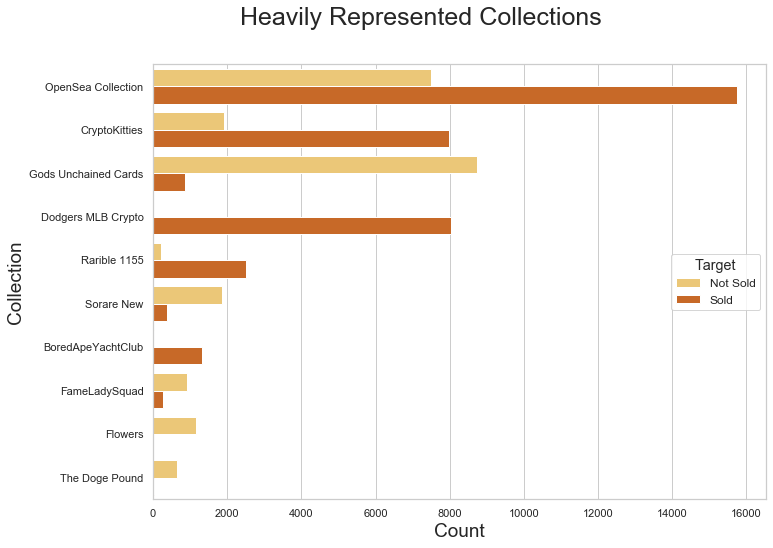

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=df_full,
              y='asset_contract.name',
              hue='target',
              order=df_full['asset_contract.name'].value_counts().iloc[:10].index, 
              palette = 'YlOrBr',
              ax=ax)
fig.suptitle('Heavily Represented Collections', fontsize=25)
ax.set_xlabel('Count', fontsize=19)
ax.set_ylabel('Collection', fontsize=19)
plt.legend(title='Target', 
           title_fontsize = 'x-large',
           labels=['Not Sold', 'Sold'],
           fontsize="large", 
           loc='best')
plt.subplots_adjust(left=.19)
plt.savefig('../images/1_popular_nft_collections.png', bboxinches='tight')

## Datetime Visualizations

### What Years Were NFTs Created?

In [13]:
len(df_full[df_full['asset_contract.created_date'].between('2020-01-01', '2020-12-31')])

3763

In [14]:
len(df_full[df_full['asset_contract.created_date'].between('2020-01-01', '2020-12-31')])

27485

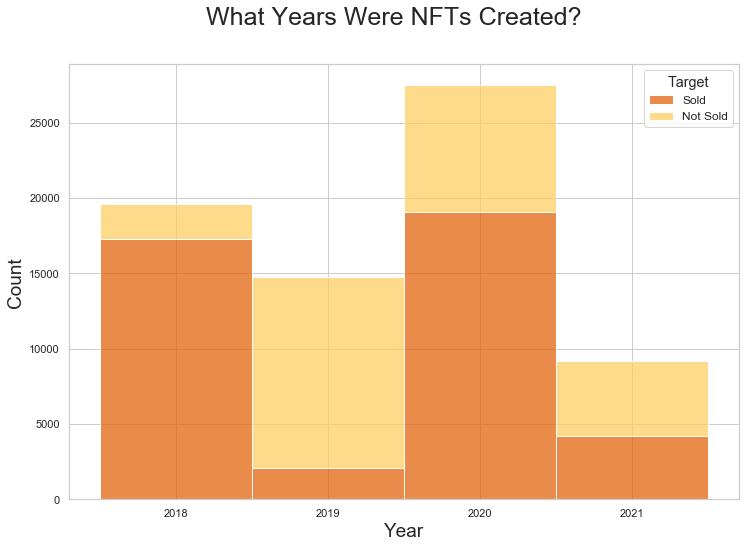

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(x=df_full['asset_contract.created_date'].dt.year, 
             hue=df_full['target'],
             hue_order=[0,1],
             discrete=True,
             bins=[2018, 2019, 2020, 2021],
             multiple='stack',
             palette = 'YlOrBr',
             ax=ax)
ax.set_xticks([2018, 2019, 2020, 2021])
fig.suptitle('What Years Were NFTs Created?', fontsize=25)
ax.set_xlabel('Year', fontsize=19)
ax.set_ylabel('Count', fontsize=19)
plt.legend(title='Target', 
           title_fontsize = 'x-large',
           labels=['Sold','Not Sold'],
           fontsize="large", 
           loc='best')
#plt.savefig('../images/2_nft_years.png', bboxinches='tight')

### What Weeks Were NFTs Created?

In [15]:
week_2018 = df_full[df_full['asset_contract.created_date'].between('2018-01-01', '2018-12-31')]['asset_contract.created_date'].dt.week
week_2019 = df_full[df_full['asset_contract.created_date'].between('2019-01-01', '2019-12-31')]['asset_contract.created_date'].dt.week
week_2020 = df_full[df_full['asset_contract.created_date'].between('2020-01-01', '2020-12-31')]['asset_contract.created_date'].dt.week
week_2021 = df_full[df_full['asset_contract.created_date'].between('2021-01-01', '2021-12-31')]['asset_contract.created_date'].dt.week
weeks_years = [(week_2018,2018),(week_2019,2019),(week_2020,2020),(week_2021,2021)]

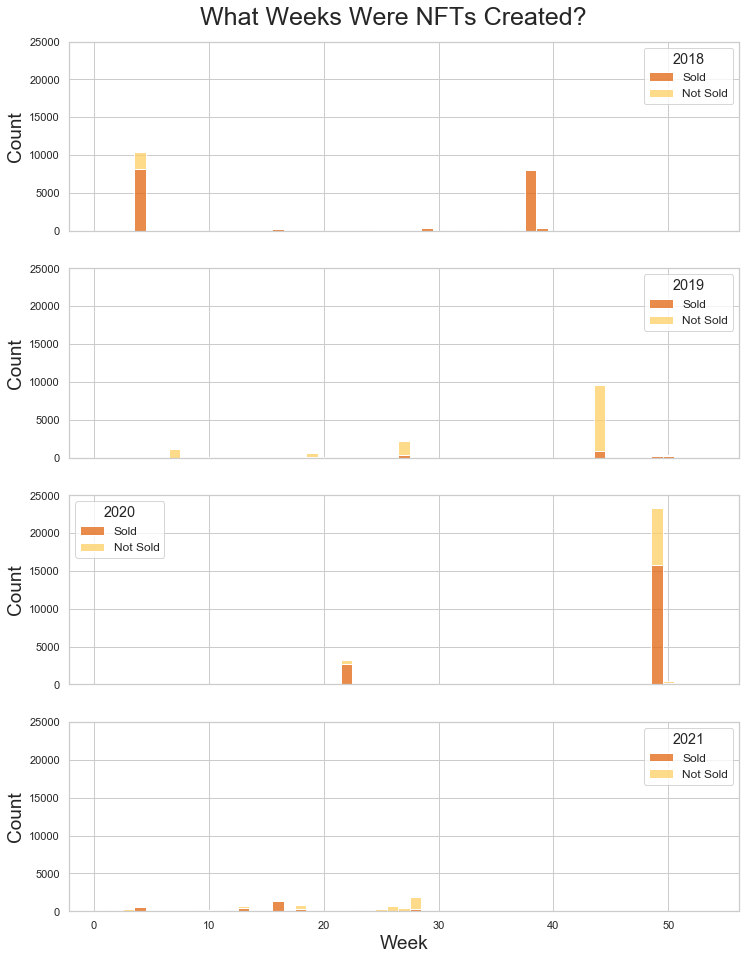

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12,16), sharex=True)  
fig.suptitle('What Weeks Were NFTs Created?', fontsize=25, y=.91)


sns.histplot(x=week_2018, hue=df_full['target'], discrete=True, multiple='stack', palette = 'YlOrBr', ax=ax1)
sns.histplot(x=week_2019, hue=df_full['target'], discrete=True, multiple='stack', palette = 'YlOrBr', ax=ax2)
sns.histplot(x=week_2020, hue=df_full['target'], discrete=True, multiple='stack', palette = 'YlOrBr', ax=ax3)
sns.histplot(x=week_2021, hue=df_full['target'], discrete=True, multiple='stack', palette = 'YlOrBr', ax=ax4)

ax1.set_ylim([0, 25000])
ax2.set_ylim([0, 25000])
ax3.set_ylim([0, 25000])
ax4.set_ylim([0, 25000])

ax1.set_ylabel('Count', fontsize=19)
ax2.set_ylabel('Count', fontsize=19)
ax3.set_ylabel('Count', fontsize=19)
ax4.set_ylabel('Count', fontsize=19)
ax4.set_xlabel('Week', fontsize=19)


ax1.legend(title='2018', title_fontsize = 'x-large', labels=['Sold', 'Not Sold'], fontsize="large")
ax2.legend(title='2019', title_fontsize = 'x-large', labels=['Sold', 'Not Sold'], fontsize="large")
ax3.legend(title='2020', title_fontsize = 'x-large', labels=['Sold', 'Not Sold'], fontsize="large")
ax4.legend(title='2021', title_fontsize = 'x-large', labels=['Sold', 'Not Sold'], fontsize="large")

# plt.subplots_adjust(right=.9)
# plt.savefig('../images/3_nft_weeks.png', bboxinches='tight')

### What Days Were NFTs Created?

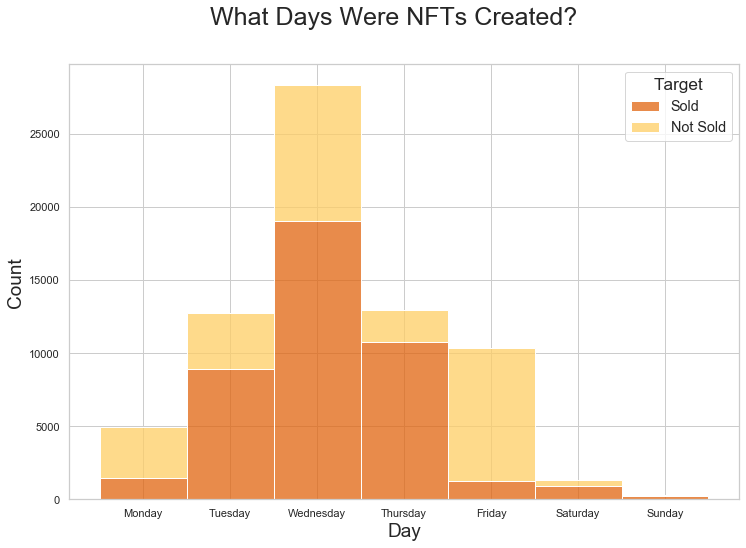

In [117]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(x=df_full['asset_contract.created_date'].dt.dayofweek, 
             hue=df_full['target'],
             discrete=True,
             multiple='stack',
             palette = 'YlOrBr',
             ax=ax)
plt.xticks([0,1,2,3,4,5,6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
fig.suptitle('What Days Were NFTs Created?', fontsize=25)
ax.set_xlabel('Day', fontsize=19)
ax.set_ylabel('Count', fontsize=19)
plt.legend(title='Target', 
           title_fontsize = 'x-large',
           labels=['Sold', 'Not Sold'],
           fontsize="large", 
           loc='best')
# plt.savefig('../images/4_nft_days.png', bboxinches='tight')

# Post-Binary Transformation

## Import & Combine Data

In [7]:
parse_dates = ['asset_contract.created_date', 'collection.created_date']
df_binary1 = pd.read_csv('../data/nft_binary.csv', low_memory=False, parse_dates=parse_dates)
df_binary2 = pd.read_csv('../data/nft_binary2_test_set.csv', low_memory=False, parse_dates=parse_dates)
df_binary = pd.concat([df_binary1, df_binary2], ignore_index=True)

## Asset Contract Total Supply

In [8]:
df_binary['asset_contract.total_supply'].value_counts(normalize=True)

0    0.733903
1    0.266097
Name: asset_contract.total_supply, dtype: float64

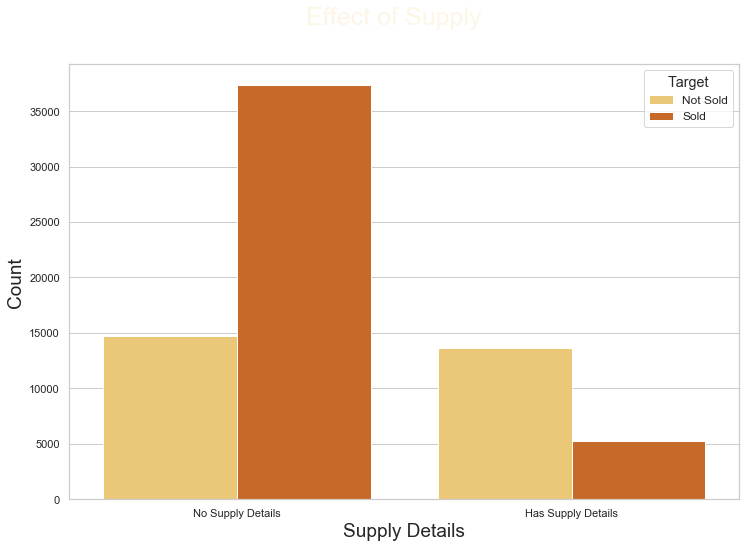

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=df_binary,
              x='asset_contract.total_supply',
              hue='target',
              palette = 'YlOrBr',
              ax=ax)
fig.suptitle('Effect of Supply', fontsize=25, color='oldlace')
plt.xticks([0,1],['No Supply Details', 'Has Supply Details'])
ax.set_xlabel('Supply Details', fontsize=19)
ax.set_ylabel('Count', fontsize=19)
plt.legend(title='Target', 
           title_fontsize = 'x-large',
           labels=['Not Sold', 'Sold'],
           fontsize="large", 
           loc='best')
# ax.spines['bottom'].set_color('oldlace')
# ax.spines['top'].set_color('oldlace')
# ax.spines['left'].set_color('oldlace')
# ax.spines['right'].set_color('oldlace')
# ax.xaxis.label.set_color('oldlace')
# ax.yaxis.label.set_color('oldlace')
# ax.tick_params(axis='x', colors='oldlace')
# ax.tick_params(axis='y', colors='oldlace')
# plt.savefig('../images/5_nft_supply.png', bboxinches='tight', transparent=True)

In [82]:
# curious about the original values

print(df_full[df_full['asset_contract.total_supply'].notna()]['asset_contract.name'].value_counts().head())
print(df_full[df_full['asset_contract.total_supply'].isna()]['asset_contract.name'].value_counts().head())

Gods Unchained Cards    9607
BoredApeYachtClub       1346
FameLadySquad           1192
The Doge Pound           669
Hashmasks                600
Name: asset_contract.name, dtype: int64
OpenSea Collection    23242
CryptoKitties          9908
Dodgers MLB Crypto     8043
Rarible 1155           2715
Sorare New             2238
Name: asset_contract.name, dtype: int64


In [83]:
# essentially several of the most popular NFT marketplaces are not reporting asset supply to 
# OpenSea. In addition it's important to see the delineation - OpenSea, CryptoKitties & Dodgers all have
# high sell rates and large quantities and while God's Unchained also has large quantities of NFTs, many are unsold
# this is why this is an accurate predictor because it is acting as a proxy feature
# to separate high volume marketplaces that also have high sell rates

## Metadata

In [84]:
df_binary['token_metadata'].value_counts(normalize=True)

0    0.760089
1    0.239911
Name: token_metadata, dtype: float64

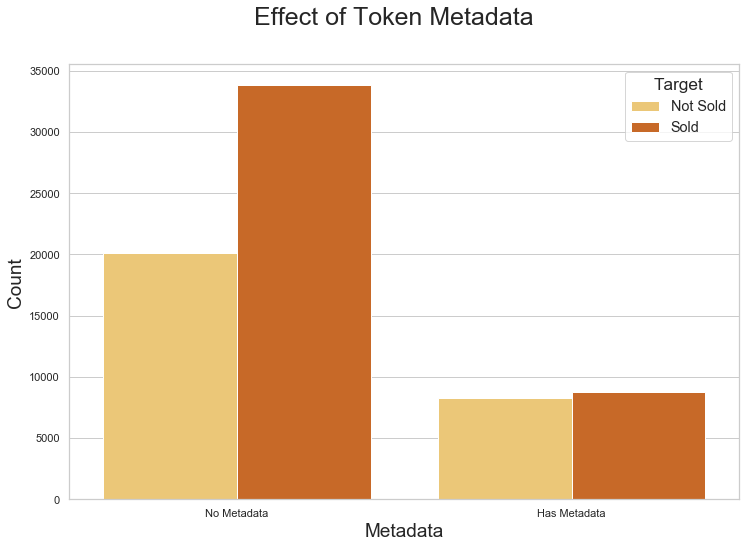

In [120]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=df_binary,
              x='token_metadata',
              hue='target',
              palette = 'YlOrBr',
              ax=ax)
fig.suptitle('Effect of Token Metadata', fontsize=25)
plt.xticks([0,1],['No Metadata', 'Has Metadata'])
ax.set_xlabel('Metadata', fontsize=19)
ax.set_ylabel('Count', fontsize=19)
plt.legend(title='Target', 
           title_fontsize = 'x-large',
           labels=['Not Sold', 'Sold'],
           fontsize="large", 
           loc='best')
# plt.savefig('../images/6_nft_metadata.png', bboxinches='tight')

In [86]:
print(df_full[df_full['token_metadata'].isna()]['asset_contract.name'].value_counts().head())
print(df_full[df_full['token_metadata'].notna()]['asset_contract.name'].value_counts().head())

OpenSea Collection      23178
CryptoKitties            9907
Gods Unchained Cards     9604
Dodgers MLB Crypto       8043
The Doge Pound            669
Name: asset_contract.name, dtype: int64
Rarible 1155         2715
Sorare New           2238
BoredApeYachtClub    1346
FameLadySquad        1192
Flowers              1150
Name: asset_contract.name, dtype: int64


In [ ]:
# same thing as above is happening here, except less accurately because 'God's Unchained" is included in null

## Collection Display Style

In [88]:
df_binary['collection.display_data.card_display_style'].value_counts(normalize=True)

1    0.872917
0    0.127083
Name: collection.display_data.card_display_style, dtype: float64

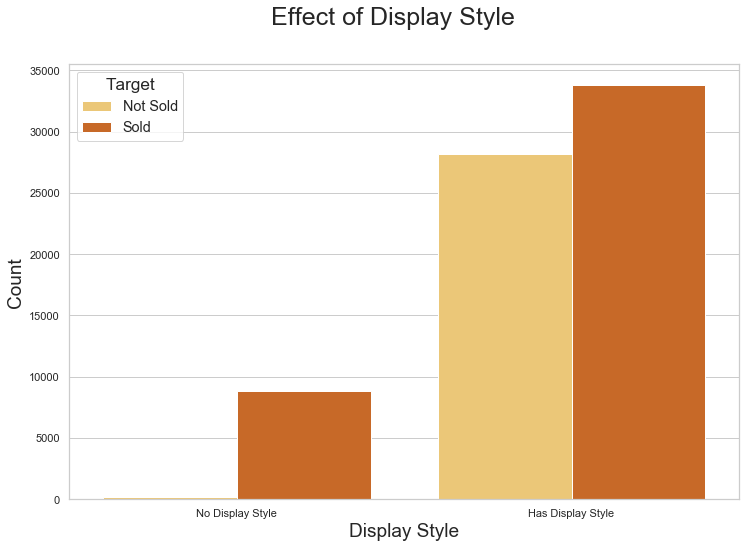

In [121]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=df_binary,
              x='collection.display_data.card_display_style',
              hue='target',
              palette = 'YlOrBr',
              ax=ax)
fig.suptitle('Effect of Display Style', fontsize=25)
plt.xticks([0,1],['No Display Style', 'Has Display Style'])
ax.set_xlabel('Display Style', fontsize=19)
ax.set_ylabel('Count', fontsize=19)
plt.legend(title='Target', 
           title_fontsize = 'x-large',
           labels=['Not Sold', 'Sold'],
           fontsize="large", 
           loc='best')
# plt.savefig('../images/7_nft_display_style.png', bboxinches='tight')

In [93]:
print(df_full[df_full['collection.display_data.card_display_style'].isna()]['asset_contract.name'].value_counts().head())
print(df_full[df_full['collection.display_data.card_display_style'].notna()]['asset_contract.name'].value_counts().head())

Dodgers MLB Crypto     8043
StaryFox                398
Hero                    330
Ledger Legend Cards     193
CryptoCards              22
Name: asset_contract.name, dtype: int64
OpenSea Collection      23242
CryptoKitties            9908
Gods Unchained Cards     9607
Rarible 1155             2715
Sorare New               2238
Name: asset_contract.name, dtype: int64


In [94]:
# this one is not as impacted by popular platforms. In fact, it is effective because it is a proxy to
# separate 'Dodgers MLB Crypto' which are almost universal sells